In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import glob, os
import numpy as np
import datetime
from pathlib import Path

[Text(0, 0.5, 'Cost (Tardiness * $10^6$ + Makespan)'),
 Text(0.5, 0, 'Instance'),
 Text(0.5, 1.0, '')]

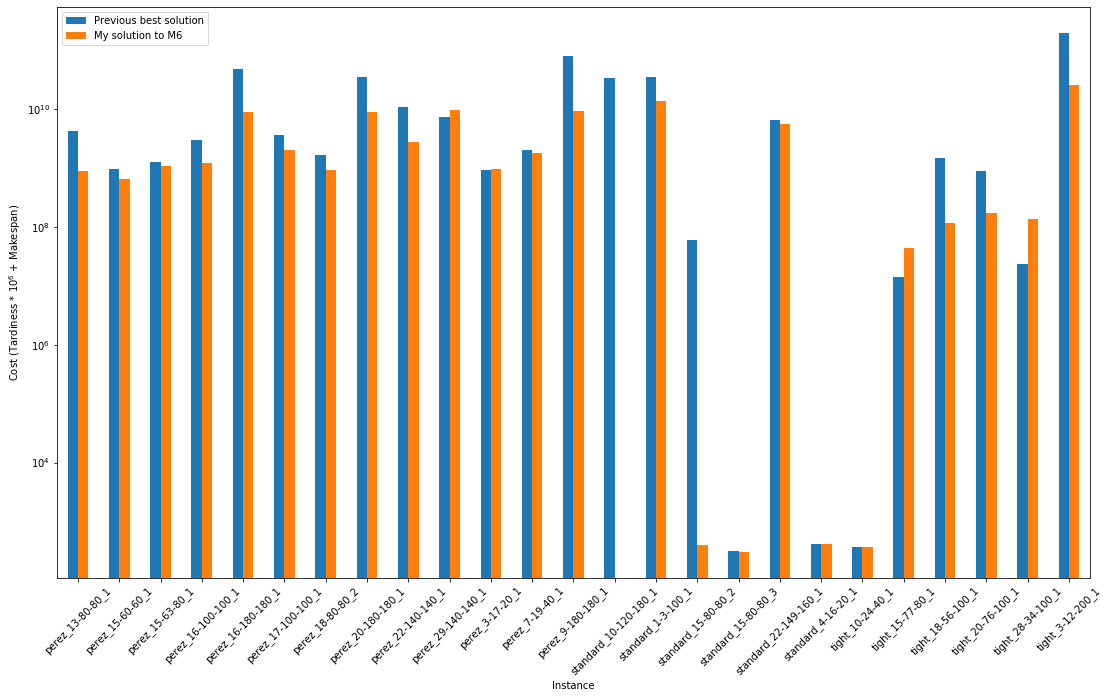

In [2]:
tardiness = [[4234, 874], [958, 633], [1256, 1079], [2917, 1228], [47234, 8789], [3649, 2007],
[1649, 903], [34619, 8780], [10542, 2783], [7130, 9645], [927, 957],
[1976, 1752], [78859, 9291], [33756, 0], [34442, 13338], [59, 0],
[0,0], [6467, 5491], [0,0], [0,0], [14, 43], [1455, 117], [877, 171],
[23, 134], [192462, 24995]]
                
makespan = [[673,360],[371,313],[496,343],[523,356],[1776,675],[532,356],
           [401,334],[1457,603],[683,431],[464,505],[520,611],[514,465],
           [2645,874],[2427,0],[7589,5909],[734,407],[322,304],[1072,1022],
           [409,409],[373,373],[644,443],[524,349],[580,309],[478,242],
           [7190,3184]]
cost = []
for i in range(len(tardiness)):
    cost.append({'Previous best solution':(tardiness[i][0]*1000000 + makespan[i][0]),
                'My solution to M6':(tardiness[i][1]*1000000 + makespan[i][1])})
    
instances = ["perez_13-80-80_1",
"perez_15-60-60_1",
"perez_15-63-80_1",
"perez_16-100-100_1",
"perez_16-180-180_1",
"perez_17-100-100_1",
"perez_18-80-80_2",
"perez_20-180-180_1",
"perez_22-140-140_1",
"perez_29-140-140_1",
"perez_3-17-20_1",
"perez_7-19-40_1",
"perez_9-180-180_1",
"standard_10-120-180_1",
"standard_1-3-100_1",
"standard_15-80-80_2",
"standard_15-80-80_3",
"standard_22-149-160_1",
"standard_4-16-20_1",
"tight_10-24-40_1",
"tight_15-77-80_1",
"tight_18-56-100_1",
"tight_20-76-100_1",
"tight_28-34-100_1",
"tight_3-12-200_1"]
    
df = pd.DataFrame(cost, 
                  index=instances)



ax = df.plot.bar(rot=0)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation = 45)
plt.yscale("log")

ax.set(xlabel='Instance', ylabel='Cost (Tardiness * $10^6$ + Makespan)',
   title='')


    

import shutil
import datetime

# Move all 30 min SA files into a single folder

paths = ["C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_1_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_2_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_3_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_4_long",
        "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_5_long"]
output_path = "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_long"

for path in paths:
    os.chdir(path)
    print(path)
    for filename in glob.glob("*.info"):
        print(dst_dir)
        i = 1
        while True:
            src_dir= path + "\\" + filename
            dst_dir= output_path + "\\" + filename.split('.')[0] + "_" + str(i) + ".soln.info"
            if(os.path.exists(dst_dir)):
                i += 1
                continue
            shutil.copy(src_dir,dst_dir)
            break

In [3]:
import sys
import glob, os
import statistics
import numpy as np
import matplotlib.pyplot as plt


def get_info(solution, splitter_symbol = ':'):
    f = open(solution, "r")
    lines = f.read().split('\n')
    (tardiness, makespan) =  (0, 0)
    for line in lines:
        if 'Tardiness' in line:
            tardiness = int(line.split(splitter_symbol)[1])
        if 'Makespan' in line:
            makespan = int(line.split(splitter_symbol)[1])
    return (tardiness, makespan)

In [4]:
path_to_instances = "C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\instances.txt"
f = open(path_to_instances, "r")
instances_with_ending = f.read().split('\n')
instances = []
for instance in instances_with_ending:
    if instance == "":
        continue
    instances.append(instance.split('.')[0])


In [5]:


def load_info(path_to_runs, splitter_symbol = ':'):
    f = open(path_to_instances, "r")

    instances = f.read().split('\n')
    if '' in instances:
        instances.remove('')
    if ' ' in instances:
        instances.remove(' ')

    os.chdir(path_to_runs)
    solutions = glob.glob("*.info")

    scores_tardiness = {}
    scores_makespan = {}
    tardiness_list = []
    makespan_list = []
    for instance in instances:
        name = instance.split('.')[0]
        for solution in solutions:
            if name in solution or name.replace("s", "standard") in solution or name.replace("p", "perez") in solution or name.replace("t", "tight") in solution:
                (tardiness, makespan) = get_info(solution, splitter_symbol)
                tardiness_list.append(tardiness)
                makespan_list.append(makespan)
                if name in scores_tardiness:
                    scores_tardiness[name].append(tardiness)
                else:
                    scores_tardiness[name] = [tardiness]
                if name in scores_makespan:
                    scores_makespan[name].append(makespan)
                else:
                    scores_makespan[name] = [makespan]

    tardiness_median = {}
    tardiness_mean = {}
    makespan_median = {}
    makespan_mean = {}
    for (score, median, mean) in [(scores_tardiness, tardiness_median, tardiness_mean),
    (scores_makespan, makespan_median, makespan_mean)]:
        for key in score.keys():
            median[key] = statistics.median(score[key])
            mean[key] = statistics.mean(score[key])

    total_t_med = statistics.median(tardiness_list)
    total_t_mea = statistics.mean(tardiness_list)
    total_ms_med = statistics.median(makespan_list)
    total_ms_mea = statistics.mean(makespan_list)

    print("tardiness median: ",total_t_med, "\nTardiness mean: ", total_t_mea, "\n", total_ms_med, total_ms_mea)
    
    return tardiness_list, scores_tardiness, scores_makespan

In [6]:
sa_1_t_mean, sa_1_t, sa_1_ms = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_1m_long")

tardiness median:  73.5 
Tardiness mean:  662.4416666666667 
 1933.0 4478.6258333333335


In [7]:
sa_3_t_mean, sa_3_t, sa_3_ms = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_3m_long")

tardiness median:  71.5 
Tardiness mean:  347.9275 
 1227.0 3862.3316666666665


In [8]:
sa_30_t_mean, sa_30_t, sa_30_ms = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_30m_long")

tardiness median:  7.0 
Tardiness mean:  216.63333333333333 
 1012.5 3162.09


In [9]:
sa_1_max_t_mean, sa_1_max_t, sa_1_max_ms = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Data\\solutions\\validation-set-solutions\\sac-r" , '=')

tardiness median:  70.0 
Tardiness mean:  382.88708333333335 
 1327.0 3223.4358333333334


D:\Programme\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


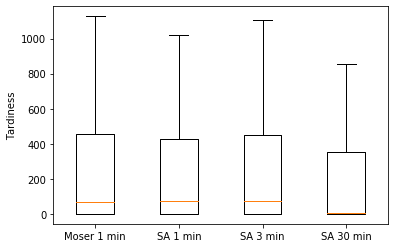

In [10]:
fig1, ax1 = plt.subplots()
ls_mean = [list(sa_1_max_t_mean), list(sa_1_t_mean), list(sa_3_t_mean), list(sa_30_t_mean)]
ax1.boxplot(ls_mean, showfliers=False)
ax1.set_xticklabels(['Moser 1 min', 'SA 1 min', 'SA 3 min', 'SA 30 min'])
plt.ylabel("Tardiness")
plt.show()

In [11]:
sa_1_T = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_1m_long_T")
sa_1_S = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_1m_long_S")
sa_1_P = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sa_1m_long_P")

tardiness median:  76.5 
Tardiness mean:  115.385 
 1642.0 4537.94
tardiness median:  0.0 
Tardiness mean:  5.7175 
 2614.5 3454.085
tardiness median:  531.5 
Tardiness mean:  528.9826086956522 
 819.0 1065.5565217391304


In [12]:
sa_1_T = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sac-r_T", "=")
sa_1_S = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sac-r_S", "=")
sa_1_P = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\sac-r_P", "=")

tardiness median:  76.5 
Tardiness mean:  110.29625 
 1208.5 3160.3275
tardiness median:  0.0 
Tardiness mean:  5.06375 
 1763.5 2314.46625
tardiness median:  620.0 
Tardiness mean:  1033.30125 
 812.0 4195.51375


tardiness median:  87305.0 
Tardiness mean:  737330.8866666667 
 3110.0 7691.919166666667
tardiness median:  38867 
Tardiness mean:  629120.2857142857 
 2755 6922.882352941177
tardiness median:  123 
Tardiness mean:  870.7572977481234 
 1463 4032.7572977481236
tardiness median:  127.0 
Tardiness mean:  942.1833333333333 
 1591.5 4036.3083333333334
tardiness median:  13.0 
Tardiness mean:  358.36422413793105 
 1468.5 3917.6637931034484


D:\Programme\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


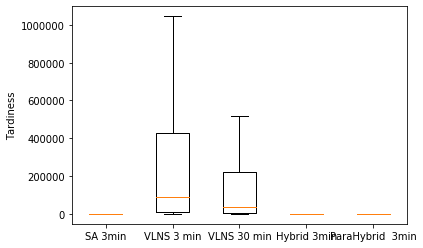

In [27]:
vlns_3m, vlns_3m_t, vlns_3m_ms = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_3m_bugfix_py")
vlns_30m, vlns_30m_t, vlns_30m_ms = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\vlns_30m_bugfix_py")
hy_3m, hy_3m_t, hy_3m_ms = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\hybrid_3m")
hy_30m, hy_30m_t, hy_30m_ms = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\hybrid_30m")
parahy_3m, parahy_3m_t, parahy_3m_ms = load_info("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\parahy_3m")

fig1, ax1 = plt.subplots()
ls_bugfix = [list(sa_3_t_mean), list(vlns_3m), list(vlns_30m), list(hy_3m), list(parahy_3m)]
ax1.boxplot(ls_bugfix, showfliers=False)
ax1.set_xticklabels(['SA 3min', 'VLNS 3 min', 'VLNS 30 min', 'Hybrid 3min', 'ParaHybrid  3min'])
plt.ylabel("Tardiness")
plt.show()

D:\Programme\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


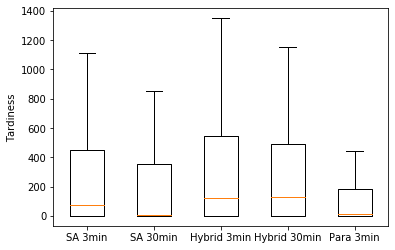

In [28]:
fig1, ax1 = plt.subplots()
ls_bugfix = [list(sa_3_t_mean),list(sa_30_t_mean), list(hy_3m), list(hy_30m), list(parahy_3m)]
ax1.boxplot(ls_bugfix, showfliers=False)
ax1.set_xticklabels(['SA 3min', 'SA 30min', 'Hybrid 3min', 'Hybrid 30min', 'Para 3min'])
plt.ylabel("Tardiness")
plt.show()

In [15]:
def change_dict_to_scores(tardiness, makespan):
    output = []
    for instance in instances:
        if instance not in tardiness:
            output.append(999999999999999)
            continue
        curr_t = tardiness[instance]
        curr_ms = makespan[instance]
        curr_scores = [(curr_t[i]*1000000 + curr_ms[i]) for i in range(len(curr_t))]
        output.append(min(curr_scores))
    return output

def change_dict_to_tardiness(tardiness):
    output = []
    for instance in instances:
        if instance not in tardiness:
            output.append(999999999999999)
            continue
        curr_t = tardiness[instance]
        curr_scores = [(curr_t[i]) for i in range(len(curr_t))]
        output.append(min(curr_scores))
    return output

In [30]:
vlns_3m_scores = change_dict_to_scores(vlns_3m_t, vlns_3m_ms)
vlns_30m_scores = change_dict_to_scores(vlns_30m_t, vlns_30m_ms)

hy_3m_scores = change_dict_to_scores(hy_3m_t, hy_3m_ms)
parahy_3m_scores = change_dict_to_scores(parahy_3m_t, parahy_3m_ms)
hy_30m_scores = change_dict_to_scores(hy_30m_t, hy_30m_ms)


sa_3m_scores = change_dict_to_scores(sa_3_t, sa_3_ms)
sa_1m_scores = change_dict_to_scores(sa_1_t, sa_1_ms)
sa_1_max_scores = change_dict_to_scores(sa_1_max_t, sa_1_max_ms)
sa_30m_scores = change_dict_to_scores(sa_30_t, sa_30_ms)

sa_3m_t = change_dict_to_tardiness(sa_3_t)
sa_1m_t = change_dict_to_tardiness(sa_1_t)
sa_1_max_t = change_dict_to_tardiness(sa_1_max_t)
sa_30m_t = change_dict_to_tardiness(sa_30_t)
vlns_3m_t_d = change_dict_to_tardiness(vlns_3m_t)
vlns_30m_t_d = change_dict_to_tardiness(vlns_30m_t)

hy_3m_t_d = change_dict_to_tardiness(hy_3m_t)
hy_30m_t_d = change_dict_to_tardiness(hy_30m_t)

parahy_3m_t_d = change_dict_to_tardiness(parahy_3m_t)


In [17]:
for i in range(len(vlns_3m_scores)):
    if hy_3m_scores[i] <= sa_3m_scores[i]:
        print(instances[i], ": ", hy_3m_scores[i], " vs ", sa_3m_scores[i])

p_30-332-340_1 :  393000710  vs  418000657
p_7-431-480_1 :  695004464  vs  729002992
t_2-490-800_1 :  27673  vs  30064
t_14-680-680_2 :  19002700  vs  24002768
p_1-364-580_1 :  37680  vs  40558
s_22-519-740_1 :  1495  vs  2232
s_5-14-620_1 :  5550  vs  8445
t_27-540-540_1 :  44001004  vs  48000711
t_22-760-760_1 :  59001548  vs  70001867
t_10-389-940_1 :  240005296  vs  246005548
t_22-471-480_1 :  59001151  vs  88000796
t_10-24-40_1 :  454  vs  612
s_5-500-500_1 :  4838  vs  5256
t_17-520-520_1 :  185001777  vs  201001121
t_6-540-540_1 :  44004387  vs  88004782
s_8-780-780_1 :  4579  vs  5303
p_27-268-860_1 :  132001569  vs  143001812
s_4-460-460_1 :  5854  vs  7678
s_3-500-500_1 :  2012189  vs  5012492
t_1-73-620_1 :  45008  vs  50348
t_15-740-740_2 :  2130  vs  2002780
t_10-230-700_1 :  69003244  vs  113002748


In [35]:
for i in range(len(vlns_3m_scores)):
    if parahy_3m_scores[i] <= sa_3m_scores[i]:
        print(instances[i], ": ", parahy_3m_scores[i], " vs ", sa_3m_scores[i])

t_2-490-800_1 :  22158  vs  30064
s_5-14-620_1 :  5231  vs  8445
t_22-760-760_1 :  46001403  vs  70001867
t_10-389-940_1 :  70005131  vs  246005548
t_14-680-680_1 :  29002216  vs  50001831
s_5-500-500_1 :  4730  vs  5256
t_13-940-940_1 :  85003714  vs  96003078
t_18-90-880_1 :  45002166  vs  101001715
t_8-3-260_1 :  85001199  vs  89001192
s_4-460-460_1 :  5721  vs  7678
p_13-80-80_1 :  363000351  vs  363000364
t_15-740-740_2 :  2033  vs  2002780
t_14-520-520_1 :  1444  vs  2008


In [18]:
for i in range(len(vlns_3m_scores)):
    if hy_30m_scores[i] <= sa_3m_scores[i]:
        print(instances[i], ": ", hy_30m_scores[i], " vs ", sa_3m_scores[i])

t_2-490-800_1 :  28301  vs  30064
p_1-364-580_1 :  38331  vs  40558
t_10-24-40_1 :  483  vs  612
s_5-500-500_1 :  5020  vs  5256
t_12-351-1000_1 :  431004238  vs  486004752
s_8-780-780_1 :  4712  vs  5303
s_4-460-460_1 :  5930  vs  7678
p_3-17-20_1 :  927000520  vs  927000520
t_24-400-400_1 :  62000828  vs  71000611


In [19]:
for i in range(len(vlns_3m_scores)):
    if hy_30m_scores[i] <= sa_30m_scores[i]:
        print(instances[i], ": ", hy_30m_scores[i], " vs ", sa_30m_scores[i])

p_3-17-20_1 :  927000520  vs  927000520


In [20]:
for i in range(len(vlns_3m_scores)):
    if vlns_30m_scores[i] <= sa_3m_scores[i]:
        print(instances[i], ": ", vlns_30m_scores[i], " vs ", sa_3m_scores[i])

t_10-24-40_1 :  454  vs  612


In [21]:
for i in range(len(vlns_3m_scores)):
    if vlns_30m_scores[i] <= sa_1_max_scores[i]:
        print(instances[i], ": ", vlns_30m_scores[i], " vs ", sa_1_max_scores[i])

In [22]:
for i in range(len(vlns_3m_scores)):
    if vlns_3m_scores[i] <= sa_1_max_scores[i]:
        print(instances[i], ": ", vlns_3m_scores[i], " vs ", sa_1_max_scores[i])

p_3-17-20_1 :  928000529  vs  928000529


In [23]:
def find_best(list_scores, list_names):
    for i in range(len(instances)):
        scores = [list_scores[j][i] for j in range(len(list_names))]
        print(instances[i], ": ", list_names[np.argmin(scores)], min(scores))

21 :  p_2-760-760_2
66 :  p_1-829-860_1
90 :  p_4-620-620_1


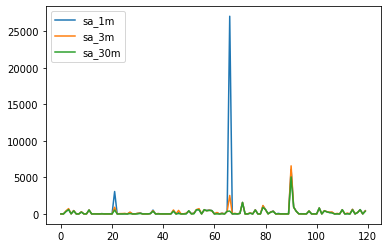

In [24]:
plt.plot(sa_1m_t, label="sa_1m")
plt.plot(sa_3m_t, label="sa_3m")
plt.plot(sa_30m_t, label="sa_30m")
plt.legend(loc="upper left")

# Print outliers
outliers = []
for i in range(len(sa_1m_t)):
    if sa_1m_t[i] > 2000:
        print(i, ": ", instances[i])
        outliers.append(i)

21 :  p_2-760-760_2
66 :  p_1-829-860_1
90 :  p_4-620-620_1


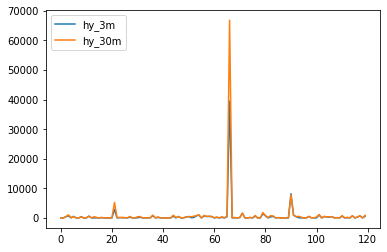

In [25]:
plt.plot(hy_3m_t_d, label="hy_3m")
plt.plot(hy_30m_t_d, label="hy_30m")
plt.legend(loc="upper left")

# Print outliers
outliers = []
for i in range(len(hy_3m_t_d)):
    if sa_1m_t[i] > 2000:
        print(i, ": ", instances[i])
        outliers.append(i)

In [26]:
# Remove outliers

for index in sorted(outliers, reverse=True):
    del sa_1m_t[index]
    del sa_3m_t[index]
    del sa_30m_t[index]
    del hy_3m_t_d[index]
    del hy_30m_t_d[index]


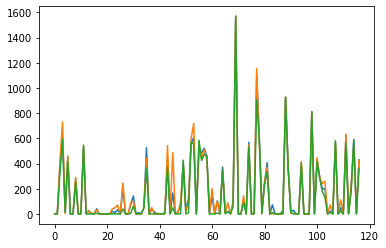

In [44]:
plt.plot(sa_1m_t, label="sa_1m")
plt.plot(sa_3m_t, label="sa_3m")
plt.plot(sa_30m_t, label="sa_30m")

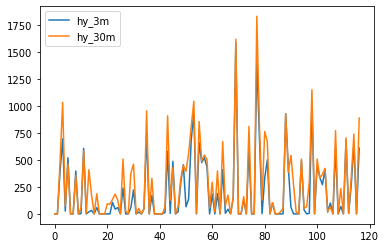

In [45]:
plt.plot(hy_3m_t_d, label="hy_3m")
plt.plot(hy_30m_t_d, label="hy_30m")
plt.legend(loc="upper left")

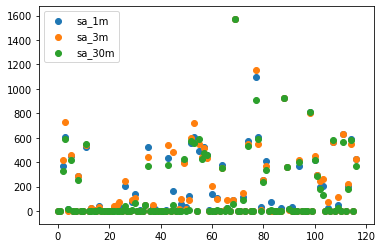

In [25]:
fig, ax = plt.subplots()
ax.scatter(range(len(sa_1m_t)), sa_1m_t, label="sa_1m")
ax.scatter(range(len(sa_3m_t)), sa_3m_t, label="sa_3m")
ax.scatter(range(len(sa_30m_t)), sa_30m_t, label="sa_30m")
plt.legend(loc="upper left")

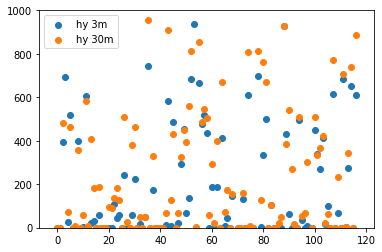

In [46]:
fig, ax = plt.subplots()
ax.scatter(range(len(hy_3m_t_d)), hy_3m_t_d, label="hy 3m")
ax.scatter(range(len(hy_30m_t_d)), hy_30m_t_d, label="hy 30m")
plt.ylim([-1, 1000])
plt.legend(loc="upper left")

In [26]:
print(hy_3m_t_d)

[0, 0, 393, 695, 26, 520, 0, 0, 397, 0, 2, 607, 0, 19, 32, 0, 59, 0, 0, 0, 0, 2883, 0, 108, 44, 59, 0, 240, 0, 0, 59, 222, 0, 17, 0, 48, 742, 0, 171, 0, 0, 0, 0, 13, 581, 5, 487, 0, 20, 291, 456, 66, 137, 685, 936, 0, 664, 476, 520, 436, 0, 185, 0, 188, 0, 411, 39463, 6, 44, 0, 147, 1586, 0, 0, 132, 0, 610, 0, 0, 1423, 698, 2, 332, 501, 0, 102, 0, 0, 0, 0, 8171, 928, 431, 62, 0, 0, 0, 495, 37, 0, 6, 1024, 0, 451, 340, 271, 411, 17, 101, 0, 613, 0, 69, 0, 682, 4, 273, 654, 0, 609]


In [27]:
find_best([vlns_30m_scores, vlns_3m_scores, sa_3m_scores, sa_1_max_scores], ["vlns_30m", "vlns_3m", "sa_3m", "max_1m"])

s_30-720-720_2 :  sa_3m 829
s_28-105-420_1 :  sa_3m 521
p_30-332-340_1 :  max_1m 337000544
p_7-431-480_1 :  max_1m 609003238
t_30-580-580_1 :  sa_3m 2001032
p_19-540-540_1 :  max_1m 452001303
t_2-490-800_1 :  max_1m 21226
s_21-530-560_1 :  sa_3m 971
p_30-52-420_1 :  max_1m 253000663
t_15-77-80_1 :  max_1m 315
t_24-280-280_1 :  sa_3m 489
p_15-60-60_1 :  sa_3m 536000322
s_23-612-640_1 :  sa_3m 993
t_14-680-680_2 :  max_1m 20002113
t_26-334-480_1 :  sa_3m 4000657
p_1-364-580_1 :  max_1m 32312
t_28-371-520_1 :  max_1m 16000781
s_10-120-180_1 :  sa_3m 652
s_15-500-500_1 :  sa_3m 1173
s_4-16-20_1 :  sa_3m 409
s_22-519-740_1 :  max_1m 1669
p_2-760-760_2 :  max_1m 772020667
s_5-14-620_1 :  max_1m 5411
t_28-620-620_1 :  max_1m 36001017
t_27-540-540_1 :  max_1m 19000850
t_22-760-760_1 :  max_1m 47001487
s_7-50-360_1 :  sa_3m 1889
t_10-389-940_1 :  max_1m 54004215
s_13-476-540_1 :  sa_3m 1519
s_24-900-900_1 :  sa_3m 1327
t_22-471-480_1 :  max_1m 58000919
t_11-400-400_1 :  max_1m 73001579
s_11-680

In [28]:
find_best([vlns_3m_scores, sa_1m_scores, sa_3m_scores, sa_30m_scores, sa_1_max_scores], 
          ["vlns_3m", "sa_1m", "sa_3m", "sa_30m", "max_1m"])

s_30-720-720_2 :  sa_30m 771
s_28-105-420_1 :  sa_30m 478
p_30-332-340_1 :  sa_30m 324000443
p_7-431-480_1 :  sa_30m 591004036
t_30-580-580_1 :  sa_3m 2001032
p_19-540-540_1 :  sa_30m 418001053
t_2-490-800_1 :  sa_30m 20660
s_21-530-560_1 :  sa_30m 866
p_30-52-420_1 :  sa_30m 250000478
t_15-77-80_1 :  max_1m 315
t_24-280-280_1 :  sa_30m 460
p_15-60-60_1 :  sa_1m 523000331
s_23-612-640_1 :  sa_30m 926
t_14-680-680_2 :  sa_30m 1712
t_26-334-480_1 :  sa_30m 587
p_1-364-580_1 :  sa_30m 32300
t_28-371-520_1 :  sa_30m 5000638
s_10-120-180_1 :  sa_30m 629
s_15-500-500_1 :  sa_30m 1122
s_4-16-20_1 :  sa_1m 409
s_22-519-740_1 :  sa_30m 1104
p_2-760-760_2 :  sa_30m 535025520
s_5-14-620_1 :  sa_30m 4509
t_28-620-620_1 :  sa_30m 768
t_27-540-540_1 :  sa_30m 659
t_22-760-760_1 :  sa_30m 1163
s_7-50-360_1 :  sa_30m 1816
t_10-389-940_1 :  sa_30m 39003640
s_13-476-540_1 :  sa_30m 1401
s_24-900-900_1 :  sa_30m 1207
t_22-471-480_1 :  sa_30m 5000752
t_11-400-400_1 :  sa_30m 63001456
s_11-680-680_1 :  sa_

In [36]:
instances



['s_30-720-720_2',
 's_28-105-420_1',
 'p_30-332-340_1',
 'p_7-431-480_1',
 't_30-580-580_1',
 'p_19-540-540_1',
 't_2-490-800_1',
 's_21-530-560_1',
 'p_30-52-420_1',
 't_15-77-80_1',
 't_24-280-280_1',
 'p_15-60-60_1',
 's_23-612-640_1',
 't_14-680-680_2',
 't_26-334-480_1',
 'p_1-364-580_1',
 't_28-371-520_1',
 's_10-120-180_1',
 's_15-500-500_1',
 's_4-16-20_1',
 's_22-519-740_1',
 'p_2-760-760_2',
 's_5-14-620_1',
 't_28-620-620_1',
 't_27-540-540_1',
 't_22-760-760_1',
 's_7-50-360_1',
 't_10-389-940_1',
 's_13-476-540_1',
 's_24-900-900_1',
 't_22-471-480_1',
 't_11-400-400_1',
 's_11-680-680_1',
 't_27-360-360_1',
 's_30-760-760_1',
 's_1-3-100_1',
 'p_13-760-760_1',
 's_19-800-800_1',
 't_14-680-680_1',
 't_10-24-40_1',
 's_27-249-660_1',
 't_20-76-100_1',
 's_5-500-500_1',
 't_18-56-100_1',
 'p_21-62-740_1',
 't_26-220-240_1',
 't_12-351-1000_1',
 's_25-300-300_1',
 't_26-540-540_1',
 't_13-940-940_1',
 'p_15-63-80_1',
 't_18-820-820_2',
 't_25-352-680_1',
 'p_18-80-80_2',
 '

In [5]:

os.chdir("C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Evaluation\\parahy_3m")
solutions = glob.glob("*.info")

instances_nr = 0
instances_where_gurobi_wins = 0

for instance in instances:
    name = instance.split('.')[0]
    for solution in solutions:
        if name in solution or name.replace("s", "standard") in solution or name.replace("p", "perez") in solution or name.replace("t", "tight") in solution:
            f = open(solution, "r")
            lines = f.read().split('\n')
            line = [line for line in lines if "Gurobi wins" in line][0]
            instances_nr += 1
            if(int(line.split(":")[1]) > 0):
                instances_where_gurobi_wins += 1
            
print("Number of instances: ", instances_nr, ", instances where gurobi wins at least once: ", instances_where_gurobi_wins)

Number of instances:  464 , instances where gurobi wins at least once:  17
